<a href="https://colab.research.google.com/github/seansothey/CSC685/blob/master/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load the data

In [52]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Explore the data

In [55]:
train_images.shape

(60000, 28, 28)

In [56]:
len(train_labels)

60000

In [57]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [58]:
test_images.shape

(10000, 28, 28)

In [59]:
len(test_labels)

10000

#Preprocess the data
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

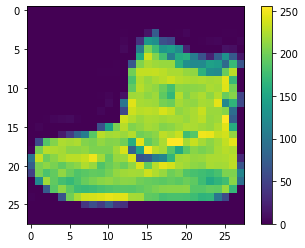

In [15]:
#View image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

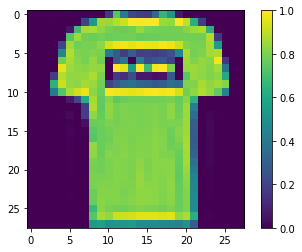

In [0]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)

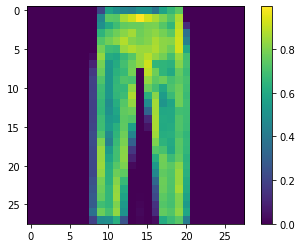

In [0]:
plt.figure()
plt.imshow(train_images[16])
plt.colorbar()
plt.grid(False)

We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, cast the datatype of the image components from an integer to a float, and divide by 255. Here's the function to preprocess the images:

It's important that the training set and the testing set are preprocessed in the same way:

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Display the first 25 images from the training set and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

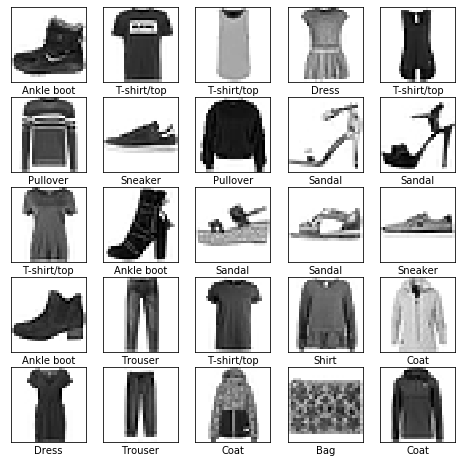

In [0]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

#Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.

In [0]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)

Reshape 3d array to 2d

In [0]:
nsamples, nx, ny = train_images.shape
train_images_2d = train_images.reshape((nsamples,nx*ny))

nsamples, nx, ny = test_images.shape
test_images_2d = test_images.reshape((nsamples,nx*ny))

In [0]:
X_train, X_test, y_train, y_test = train_images_2d, test_images_2d, train_labels, test_labels

In [0]:
import time

t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()

In [32]:
#See the training time
print("Training took {:.2f}s".format(t1 - t0))

Training took 10.06s


In [35]:
#See the accuracy on test set
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.855

#Next, use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%.

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster?

In [0]:
rnd_clf2 = RandomForestClassifier(n_estimators=10, random_state=42)
t0 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

In [38]:
#See the time after PCA
print("Training took {:.2f}s".format(t1 - t0))

Training took 13.79s


The training time suppose to be faster after applying PCA. Well, as we may know, dimensionality reduction does not always lead to faster training time. It depends on the dataset and the model and the training algorithm. If you try a softmax classifier instead of a random forest classifier, you will find that training time is reduced by a factor of 3 when using PCA. 

In [39]:
#See the accuracy on test set after PCA
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.8122

It is common for performance to drop slightly when reducing dimensionality, because we do lose some useful signal in the process. However, the performance drop is rather severe in this case. So PCA really did not help: it slowed down training and reduced performance.

#Bonus:  try with softmax regression


In [40]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [41]:
#See the the training time
print("Training took {:.2f}s".format(t1 - t0))

Training took 33.22s


In [42]:
#See the accuracy on test set
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8439

So softmax regression takes much longer to train on this dataset than the random forest classifier, and it performs worse on the test set with accuracy 0.85 vs 0.84. Now let's train the softmax regression model using the reduced dataset.

In [43]:
log_clf2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [44]:
#See the training time
print("Training took {:.2f}s".format(t1 - t0))

Training took 12.23s


In [47]:
#See the accuracy
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.8442

A very slight drop in performance, which might be a reasonable price to pay for a 3 times speedup, depending on the application. Therefore, PCA can give you a formidable speedup... but not always!

#Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image's target class.

Dimensionality reduction on the full 60,000 images takes a very long time, so let's only do this on a random subset of 10,000 images:

In [0]:
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = train_images_2d[idx]
y = train_labels[idx]

Use t-SNE to reduce dimensionality down to 2D so we can plot the dataset:

In [0]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

Use Matplotlib's scatter() function to plot a scatterplot, using a different color for each digit:

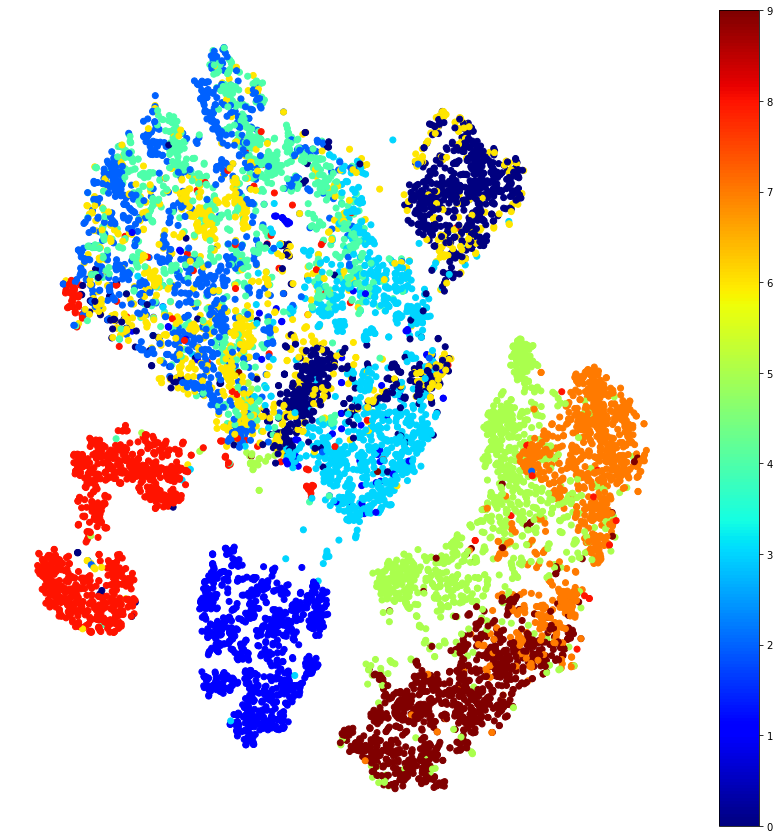

In [68]:
plt.figure(figsize=(15,15))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

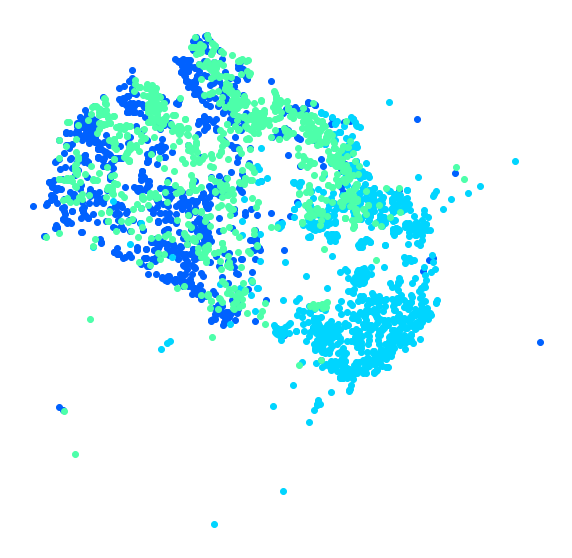

In [72]:
#Focus on the overlap digits 

import matplotlib as mpl
plt.figure(figsize=(10,10))
cmap = mpl.cm.get_cmap("jet")
for digit in (2, 3, 4):
    plt.scatter(X_reduced[y == digit, 0], X_reduced[y == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

Produce a nicer image by running t-SNE on these 3 digits

In [0]:
idx = (y == 2) | (y == 3) | (y == 5) 
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

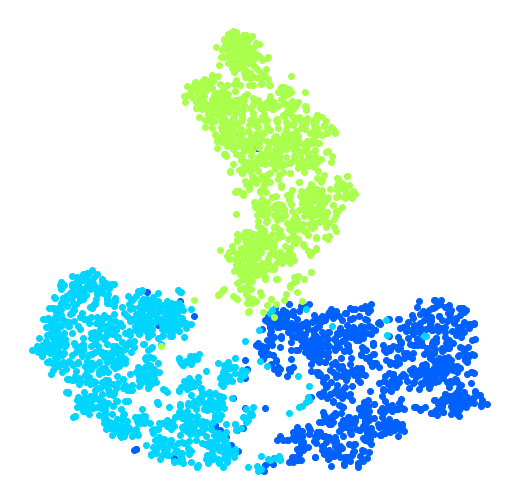

In [74]:
plt.figure(figsize=(9,9))
for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

In [0]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

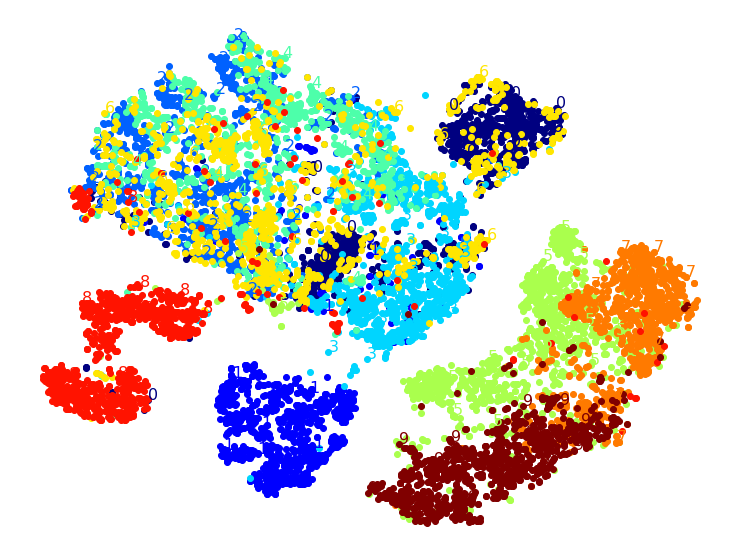

In [86]:
plot_digits(X_reduced, y)

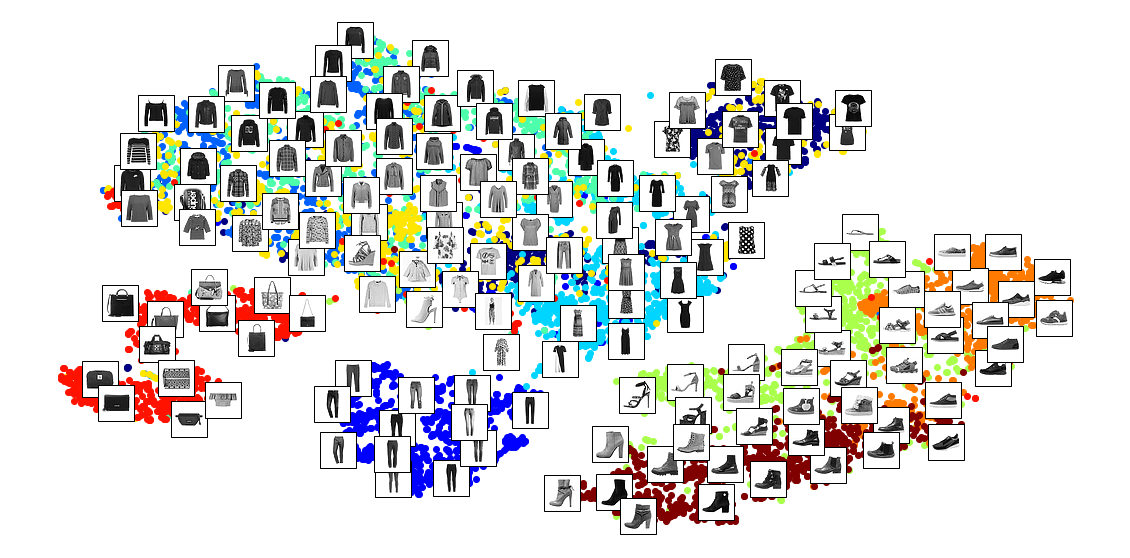

In [93]:
plot_digits(X_reduced, y, images=X, figsize=(20, 10))

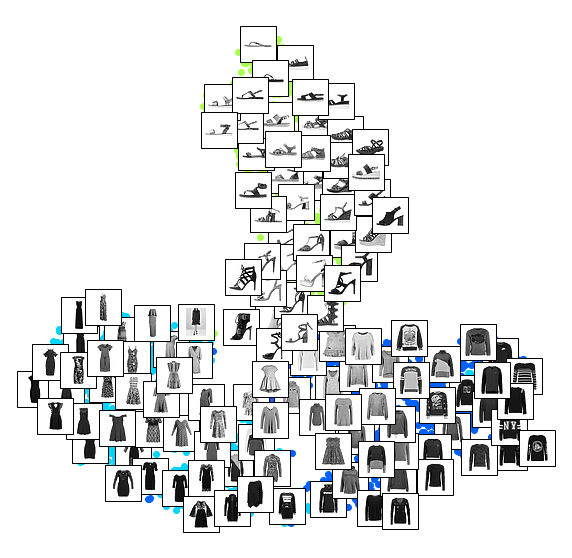

In [92]:
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(10, 10))

#Using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

#PCA

PCA took 0.9s.


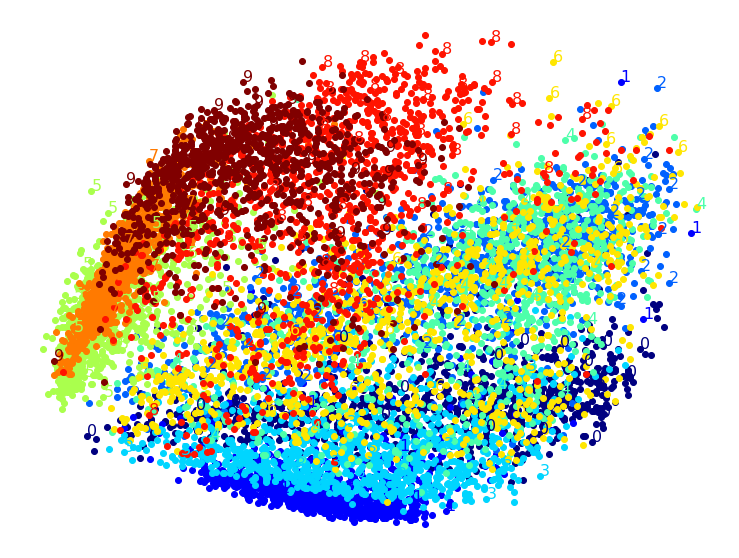

In [94]:
from sklearn.decomposition import PCA
import time

t0 = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("PCA took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_reduced, y)
plt.show()

#LLE

LLE took 196.8s.


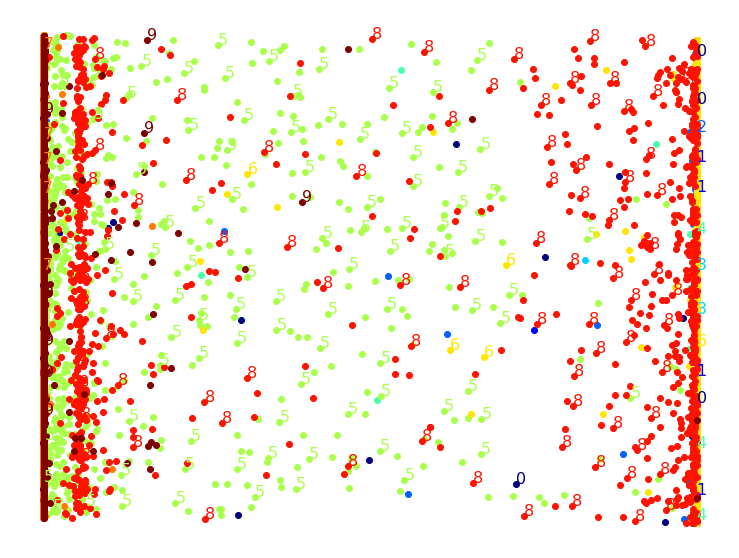

In [95]:
from sklearn.manifold import LocallyLinearEmbedding

t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_lle_reduced, y)
plt.show()

#PCA + LLE

PCA+LLE took 20.5s.


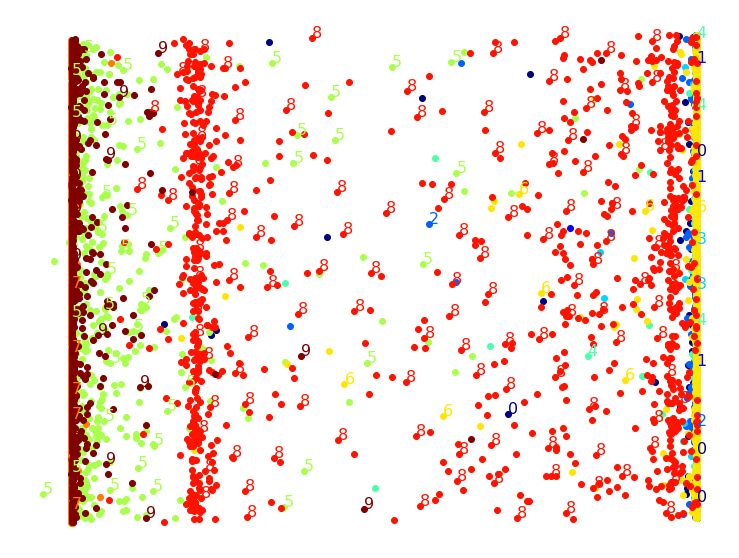

In [96]:
from sklearn.pipeline import Pipeline

pca_lle = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_lle_reduced = pca_lle.fit_transform(X)
t1 = time.time()
print("PCA+LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_lle_reduced, y)
plt.show()

#MDS

MDS took 124.5s (on just 2,000 MNIST images instead of 10,000).


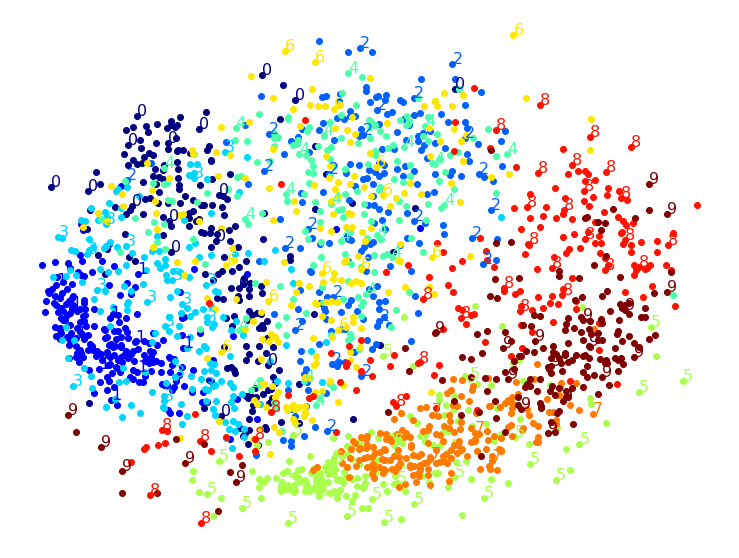

In [97]:
from sklearn.manifold import MDS

m = 2000
t0 = time.time()
X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X[:m])
t1 = time.time()
print("MDS took {:.1f}s (on just 2,000 MNIST images instead of 10,000).".format(t1 - t0))
plot_digits(X_mds_reduced, y[:m])
plt.show()

#PCA + MDS

PCA+MDS took 124.5s (on 2,000 MNIST images).


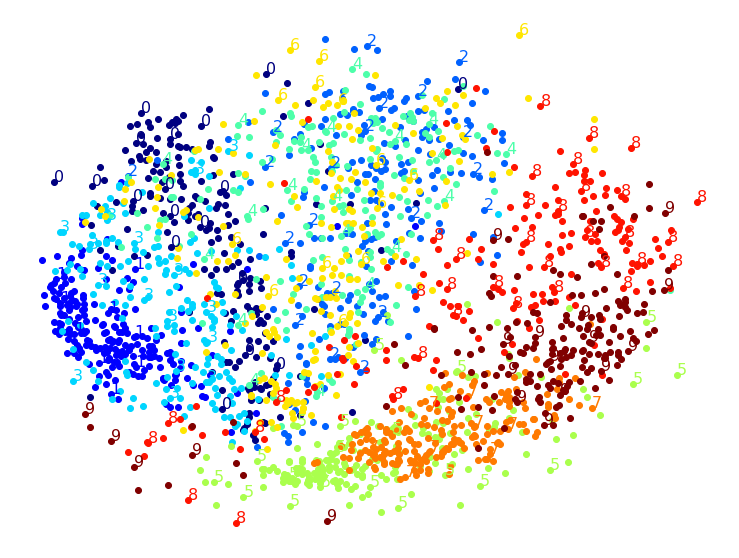

In [98]:
from sklearn.pipeline import Pipeline

pca_mds = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("mds", MDS(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_mds_reduced = pca_mds.fit_transform(X[:2000])
t1 = time.time()
print("PCA+MDS took {:.1f}s (on 2,000 MNIST images).".format(t1 - t0))
plot_digits(X_pca_mds_reduced, y[:2000])
plt.show()

#Bonus
LDA
t-SNE
PCA + t-SNE

LDA took 3.4s.


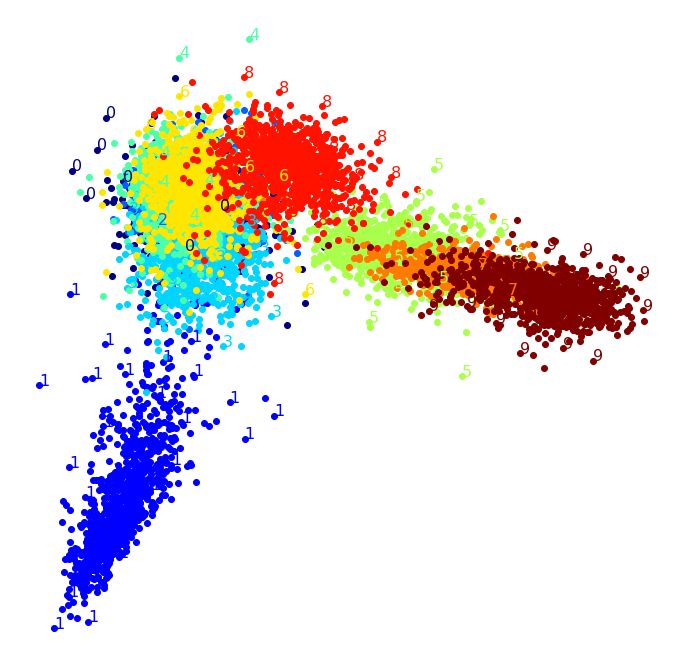

In [99]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t0 = time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
t1 = time.time()
print("LDA took {:.1f}s.".format(t1 - t0))
plot_digits(X_lda_reduced, y, figsize=(12,12))
plt.show()

t-SNE took 294.2s.


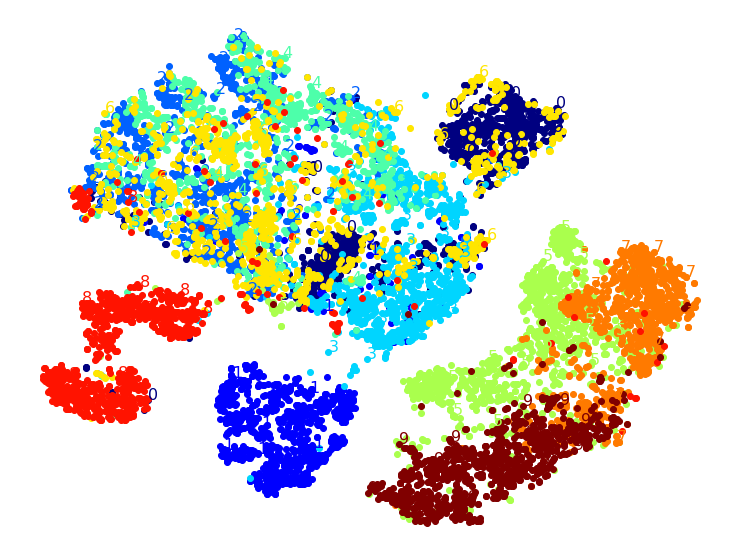

In [100]:
from sklearn.manifold import TSNE

t0 = time.time()
X_tsne_reduced = TSNE(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_tsne_reduced, y)
plt.show()

PCA+t-SNE took 112.8s.


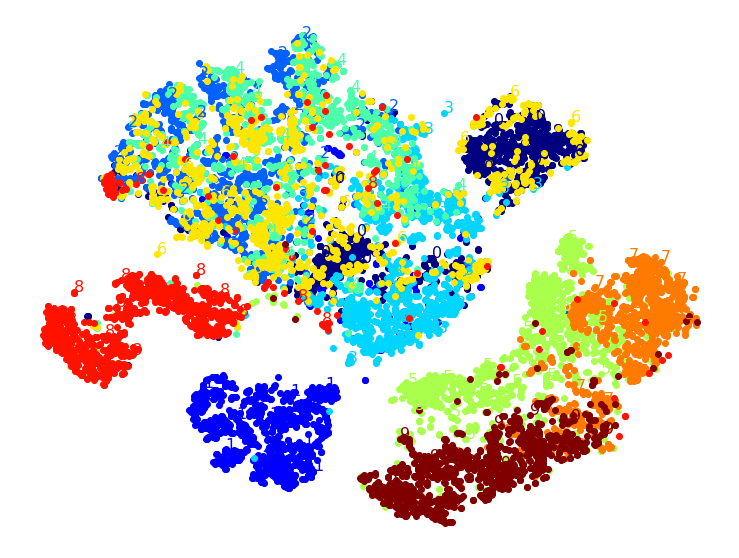

In [101]:
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
t1 = time.time()
print("PCA+t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_tsne_reduced, y)
plt.show()

***In summary, PCA roughly gave us a 25% speedup, without damaging the result.***

#Bonus: Try to build model with neural network

#Setup the layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them.
Most of deep learning consists of chaining together simple layers. Most layers, like tf.keras.layers.Dense, have parameters that are learned during training.

In [102]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


#Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

Loss function —This measures how accurate the model is during training. We want to minimize this function to steer the model in the right direction.
Optimizer —This is how the model is updated based on the data it sees and its loss function.
Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [0]:
model.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics=['accuracy'])

#Train the model
To start training, call the model.fit method—the model is "fit" to the training data:

In [105]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.5132 - acc: 0.8266
Epoch 2/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.5048 - acc: 0.8298
Epoch 3/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.5008 - acc: 0.8307
Epoch 4/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.4851 - acc: 0.8346
Epoch 5/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.4837 - acc: 0.8370
Epoch 6/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.4806 - acc: 0.8382
Epoch 7/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.4806 - acc: 0.8395
Epoch 8/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.4739 - acc: 0.8390
Epoch 9/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.4712 - acc: 0.8411
Epoch 10/10
60000/60000 [==============================] - 

#Evaluate accuracy
Next, compare how the model performs on the test dataset:

In [107]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.6073 - acc: 0.8031
Test accuracy: 0.8031


#Make predictions
With the model trained, we can use it to make predictions about some images.

In [0]:
predictions = model.predict(test_images)

In [109]:
#Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

predictions[0]

array([4.1974605e-12, 2.5343758e-09, 0.0000000e+00, 6.1968486e-11,
       7.1789081e-37, 2.7821343e-02, 3.7763631e-19, 3.2986589e-02,
       9.3211727e-10, 9.3919206e-01], dtype=float32)

In [110]:
predictions[1]

array([0.06034873, 0.0094094 , 0.68190724, 0.03528478, 0.02084121,
       0.02678598, 0.11119619, 0.02176961, 0.02809449, 0.00436244],
      dtype=float32)

In [111]:
predictions[2]

array([2.6801692e-06, 9.9999738e-01, 3.9682652e-20, 1.1465581e-10,
       2.4931520e-17, 4.5498978e-28, 2.8258916e-14, 0.0000000e+00,
       1.6714144e-21, 0.0000000e+00], dtype=float32)

In [112]:
predictions[9]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 9.7158840e-03, 0.0000000e+00, 9.8351848e-01,
       1.2511406e-05, 6.7530768e-03], dtype=float32)

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value:

In [113]:
np.argmax(predictions[0])

9

So the model is most confident that this image is an ankle boot, or class_names[9]. And we can check the test label to see this is correct:

In [114]:
test_labels[0]

9

We can graph this to look at the full set of 10 channels



In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

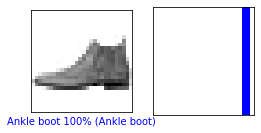

In [0]:
#Let's look at the 0th image, predictions, and prediction array

i = 0
plt.figure(figsize=(4,2))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

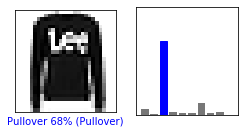

In [127]:
i = 1
plt.figure(figsize=(4,2))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

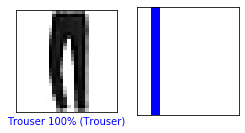

In [128]:
i = 2
plt.figure(figsize=(4,2))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

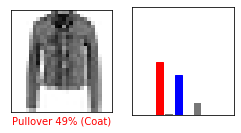

In [129]:
i = 10
plt.figure(figsize=(4,2))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

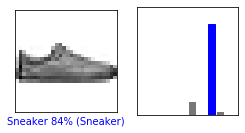

In [130]:
i = 12
plt.figure(figsize=(4,2))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

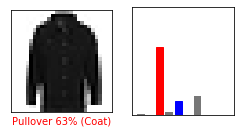

In [131]:
i = 14
plt.figure(figsize=(4,2))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident.

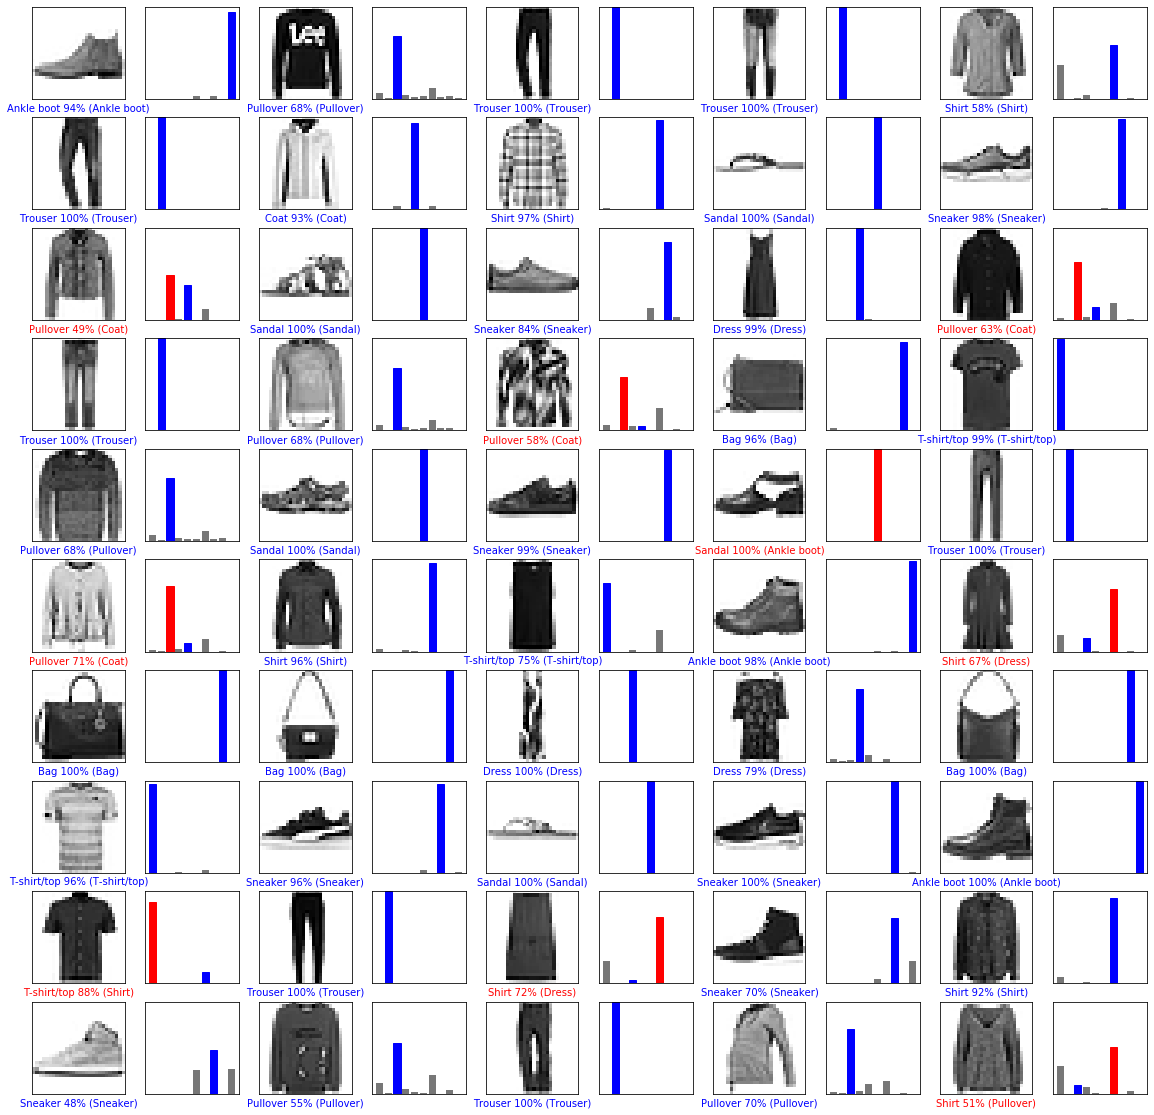

In [132]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

Based on the accuracy 80%, we can see clearly the incorrect prediction with the red bar.